In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('complaints.csv')

C:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2019-06-13,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,CAPITAL ONE FINANCIAL CORPORATION,PA,18640,NaN,Consent not provided,Web,2019-06-13,Closed with explanation,Yes,NaN,3274605
1,2019-11-01,Vehicle loan or lease,Loan,Struggling to pay your loan,Denied request to lower payments,I contacted Ally on Friday XX/XX/XXXX after fa...,Company has responded to the consumer and the ...,ALLY FINANCIAL INC.,NJ,8854,NaN,Consent provided,Web,2019-11-01,Closed with explanation,Yes,NaN,3425257
2,2019-04-01,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",PA,19067,NaN,Consent not provided,Web,2019-04-01,Closed with explanation,Yes,NaN,3198225
3,2019-04-10,Credit card or prepaid card,Store credit card,Closing your account,Can't close your account,NaN,Company believes it acted appropriately as aut...,Atlanticus Services Corporation,WI,54409,Older American,NaN,Referral,2019-04-16,Closed with explanation,No,NaN,3207424
4,2020-04-21,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,Capital One Auto Finance incorrectly and witho...,NaN,CAPITAL ONE FINANCIAL CORPORATION,GA,30024,NaN,Consent provided,Web,2020-04-21,Closed with explanation,Yes,NaN,3616748


In [4]:
data.dtypes

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object

In [5]:
data.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [6]:
useless_attr = ['Date received', 'Company', 'State', 'ZIP code', 'Consumer consent provided?', 'Submitted via', 'Date sent to company', 'Timely response?', 'Complaint ID']

In [7]:
data = data.drop(useless_attr,axis=1)

In [8]:
data.head()

,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Tags,Company response to consumer,Consumer disputed?
0,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,NaN,Closed with explanation,NaN
1,Vehicle loan or lease,Loan,Struggling to pay your loan,Denied request to lower payments,I contacted Ally on Friday XX/XX/XXXX after fa...,Company has responded to the consumer and the ...,NaN,Closed with explanation,NaN
2,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,NaN,Company has responded to the consumer and the ...,NaN,Closed with explanation,NaN
3,Credit card or prepaid card,Store credit card,Closing your account,Can't close your account,NaN,Company believes it acted appropriately as aut...,Older American,Closed with explanation,NaN
4,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,Capital One Auto Finance incorrectly and witho...,NaN,NaN,Closed with explanation,NaN


In [9]:
data['Tags'].value_counts()

Servicemember                    155277
Older American                   110447
Older American, Servicemember     24748
Name: Tags, dtype: int64

In [10]:
data['Tags'].isnull().sum()

2105561

In [11]:
#having a loook into the values of count of each columns and there count in respect to NoShow column
for i, predictor in enumerate(data):
    print('-'*10,predictor,'-'*10)
    print(data[predictor].value_counts()) 
    print('\n')

---------- Product ----------
Credit reporting, credit repair services, or other personal consumer reports    905199
Debt collection                                                                 397753
Mortgage                                                                        343338
Credit reporting                                                                140431
Credit card or prepaid card                                                     129578
Checking or savings account                                                     107787
Credit card                                                                      89190
Bank account or service                                                          86206
Student loan                                                                     64201
Money transfer, virtual currency, or money service                               35448
Consumer Loan                                                                    31600
Vehicle loan 

Servicemember                    155277
Older American                   110447
Older American, Servicemember     24748
Name: Tags, dtype: int64


---------- Company response to consumer ----------
Closed with explanation            1973090
Closed with non-monetary relief     248447
Closed with monetary relief         108022
Closed without relief                17868
Closed                               17611
In progress                          16455
Untimely response                     9233
Closed with relief                    5304
Name: Company response to consumer, dtype: int64


---------- Consumer disputed? ----------
No     620081
Yes    148378
Name: Consumer disputed?, dtype: int64




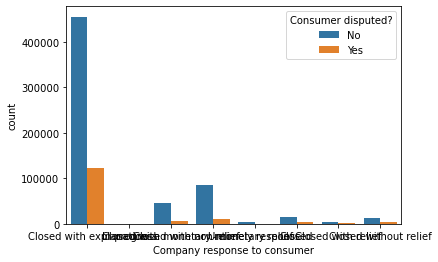

In [12]:
 sns.countplot(data=data, x='Company response to consumer', hue='Consumer disputed?')

In [13]:
data.isnull().sum()/len(data)

Product                         0.000000
Sub-product                     0.098147
Issue                           0.000000
Sub-issue                       0.267567
Consumer complaint narrative    0.651420
Company public response         0.590411
Tags                            0.878770
Company response to consumer    0.000001
Consumer disputed?              0.679279
dtype: float64

In [14]:
len(data)

2396033

In [15]:
data.isnull().sum()

Product                               0
Sub-product                      235164
Issue                                 0
Sub-issue                        641100
Consumer complaint narrative    1560823
Company public response         1414645
Tags                            2105561
Company response to consumer          3
Consumer disputed?              1627574
dtype: int64

In [17]:
data['Consumer disputed?'].value_counts()

No     620081
Yes    148378
Name: Consumer disputed?, dtype: int64

In [19]:
data = data.dropna(subset=['Consumer complaint narrative'])

In [20]:
data.isnull().sum()

Product                              0
Sub-product                      52172
Issue                                0
Sub-issue                       171673
Consumer complaint narrative         0
Company public response         432740
Tags                            702275
Company response to consumer         1
Consumer disputed?              671148
dtype: int64

In [21]:
data['Consumer disputed?'].value_counts()

No     128255
Yes     35807
Name: Consumer disputed?, dtype: int64

In [22]:
data = data.drop(['Sub-product','Sub-issue','Company public response','Tags'],axis = 1)

In [23]:
data.isnull().sum()

Product                              0
Issue                                0
Consumer complaint narrative         0
Company response to consumer         1
Consumer disputed?              671148
dtype: int64

In [24]:
data['Consumer disputed?'].value_counts()

No     128255
Yes     35807
Name: Consumer disputed?, dtype: int64

In [25]:
len(data)

835210

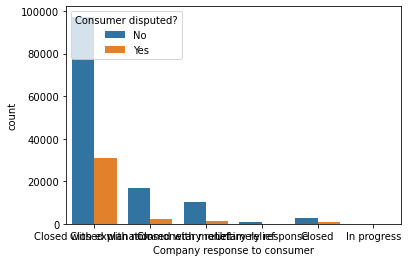

In [26]:
 sns.countplot(data=data, x='Company response to consumer', hue='Consumer disputed?')

In [27]:
data.isnull().sum()/len(data)

Product                         0.000000
Issue                           0.000000
Consumer complaint narrative    0.000000
Company response to consumer    0.000001
Consumer disputed?              0.803568
dtype: float64

In [28]:
data['Product'].value_counts()

Credit reporting, credit repair services, or other personal consumer reports    329868
Debt collection                                                                 161972
Mortgage                                                                         86156
Credit card or prepaid card                                                      63095
Checking or savings account                                                      38986
Credit reporting                                                                 31588
Student loan                                                                     29430
Money transfer, virtual currency, or money service                               19488
Credit card                                                                      18838
Vehicle loan or lease                                                            15659
Bank account or service                                                          14885
Payday loan, title loan, or personal loan  

In [29]:
data['Issue'].value_counts()

Incorrect information on your report                                                182370
Problem with a credit reporting company's investigation into an existing problem    103300
Attempts to collect debt not owed                                                    56943
Improper use of your report                                                          35991
Trouble during payment process                                                       24933
                                                                                     ...  
Property was damaged or destroyed property                                               5
Lender sold the property                                                                 3
Problem with an overdraft                                                                3
Lender damaged or destroyed vehicle                                                      2
Lender damaged or destroyed property                                                     1

In [30]:
data['Company response to consumer'].value_counts()        

Closed with explanation            700953
Closed with non-monetary relief     86924
Closed with monetary relief         39307
Untimely response                    4237
Closed                               3741
In progress                            47
Name: Company response to consumer, dtype: int64

In [31]:
data = data.drop(['Company response to consumer'],axis=1)

In [32]:
data = data.dropna()

In [33]:
data.isnull().sum()

Product                         0
Issue                           0
Consumer complaint narrative    0
Consumer disputed?              0
dtype: int64

In [36]:
data.to_csv('Preprocessed raw data.csv',index=False)